In [80]:
import h5py
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Resultados sem ataque

## Carregando os dados

In [93]:
paths = {
    'sem_ataque': 'resultados-trabalho-final/MNIST_FedAvg_test_0_sem_ataque.h5',
    'flipping_fixos_40': 'resultados-trabalho-final/fixos/MNIST_FedAvg_test_fixos_40_ml.h5',
    'flipping_fixo_aleatorio_40': 'resultados-trabalho-final/fixo-aleatorio/MNIST_FedAvg_fixo_aleatorio_40_ml.h5',
    'flipping_aleatorios_40': 'resultados-trabalho-final/aleatorios/MNIST_FedAvg_test_40_aleatorios.h5'
}

In [94]:
def carregar_resultados(arquivos_dict):
    resultados = {}

    for nome, caminho in arquivos_dict.items():
        with h5py.File(caminho, 'r') as f:
            resultado = {}
            resultado['acuracia_teste'] = f['rs_test_acc'][:]
            resultado['perda_treinamento'] = f['rs_train_loss'][:]
            resultado['auc_teste'] = f['rs_test_auc'][:] if f['rs_test_auc'].shape[0] > 0 else None
            resultado['confusion_matrix'] = f['rs_test_cm'][:]
        
        resultados[nome] = resultado
    
    return resultados


In [95]:
todos_resultados = carregar_resultados(paths)

In [96]:
print(todos_resultados.keys())

dict_keys(['sem_ataque', 'flipping_fixos_40', 'flipping_fixo_aleatorio_40', 'flipping_aleatorios_40'])


## Função para plotar o grafico da acurácia

In [ ]:
def plotar_acuracias(resultados_dict):
    plt.figure(figsize=(10, 6))

    for nome, resultado in resultados_dict.items():
        epocas = list(range(1, len(resultado['acuracia_teste']) + 1))
        plt.plot(epocas, resultado['acuracia_teste'], label=nome)

    plt.title('Acurácia ao longo das épocas')
    plt.xlabel('Épocas')
    plt.ylabel('Acurácia')
    plt.legend()
    plt.grid(True)
    plt.show()

    for nome, resultado in resultados_dict.items():
        print(f"Acurácia final ({nome}): {resultado['acuracia_teste'][-1]}")


In [36]:
def plotar_acuracia_individual(resultado, nome="sem_ataque"):
    epocas = list(range(1, len(resultado['acuracia_teste']) + 1))
    
    plt.figure(figsize=(8, 5))
    plt.plot(epocas, resultado['acuracia_teste'], label=f'Acurácia Teste ({nome})')
    
    plt.title('Acurácia ao longo das épocas')
    plt.xlabel('Épocas')
    plt.ylabel('Acurácia')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    print(f"Acurácia final ({nome}): {resultado['acuracia_teste'][-1]}")

In [56]:
def plotar_loss_individual(resultado, nome="sem_ataque"):
    epocas = list(range(1, len(resultado['perda_treinamento']) + 1))
    
    plt.figure(figsize=(8, 5))
    plt.plot(epocas, resultado['perda_treinamento'], label=f'Perda Treinamento ({nome})')
    
    plt.title('Perda ao longo das épocas')
    plt.xlabel('Épocas')
    plt.ylabel('Perda')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    print(f"Perda final ({nome}): {resultado['perda_treinamento'][-1]}")


In [51]:
def plotar_losses(resultados_dict):
    plt.figure(figsize=(10, 6))

    for nome, resultado in resultados_dict.items():
        epocas = list(range(1, len(resultado['perda_treinamento']) + 1))
        plt.plot(epocas, resultado['perda_treinamento'], label=nome)

    plt.title('Perda de Treinamento ao longo das épocas')
    plt.xlabel('Épocas')
    plt.ylabel('Perda')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Exibir perda final de cada experimento
    for nome, resultado in resultados_dict.items():
        print(f"Perda final ({nome}): {resultado['perda_treinamento'][-1]}")


In [68]:
def plotar_confusion_matrix_individual(resultado, nome="sem_ataque", labels=None):
    cm_normalized = resultado.astype(float) / resultado.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap='Blues', cbar=True)
    plt.title(f"Matriz de Confusão - {nome} (normalizada)")
    plt.xlabel("Classe Prevista")
    plt.ylabel("Classe Real")
    plt.show()
    plt.figure(figsize=(6, 5))
    

In [85]:
def calcular_recall_df(resultado, labels=None, round_idx=-1):
    cm = resultado['confusion_matrix'][round_idx]  # pega a matriz final
    recalls = []
    
    for i in range(cm.shape[0]):
        tp = cm[i, i]
        fn = cm[i, :].sum() - tp
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0.0
        recalls.append(recall)
    
    labels = labels if labels else [str(i) for i in range(cm.shape[0])]
    df = pd.DataFrame({"Classe": labels, "Recall": recalls})
    
    return df

## Acurácia

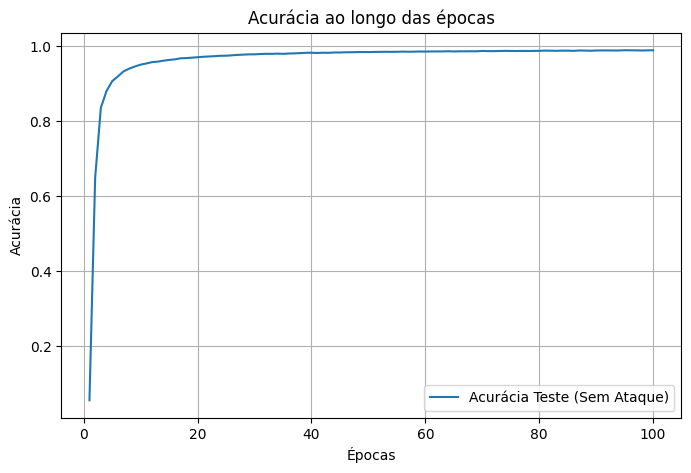

Acurácia final (Sem Ataque): 0.9889745786918024


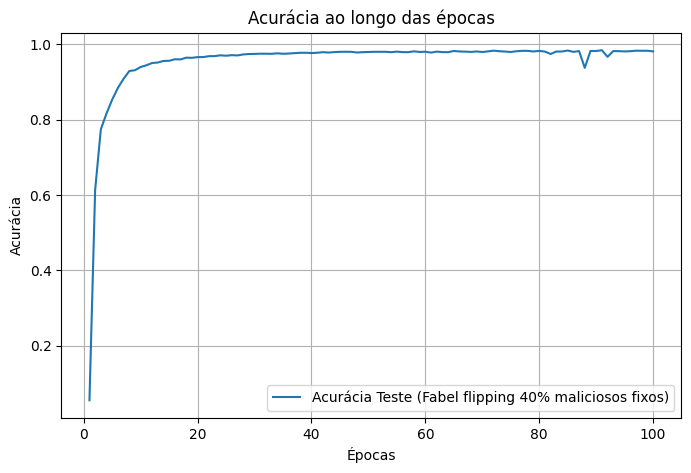

Acurácia final (Fabel flipping 40% maliciosos fixos): 0.9811482433590403


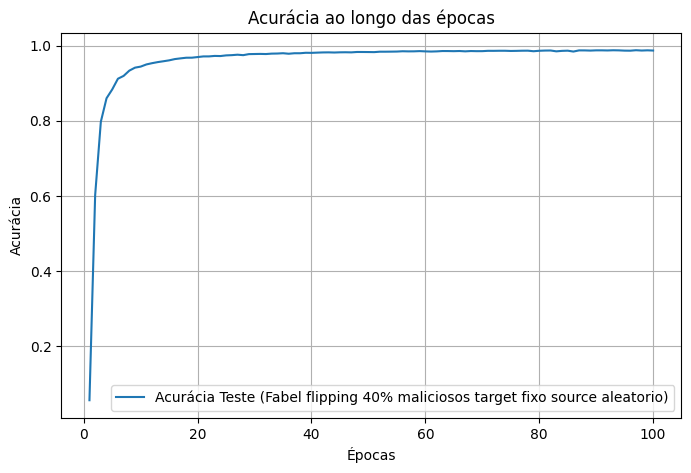

Acurácia final (Fabel flipping 40% maliciosos target fixo source aleatorio): 0.9873179091688089


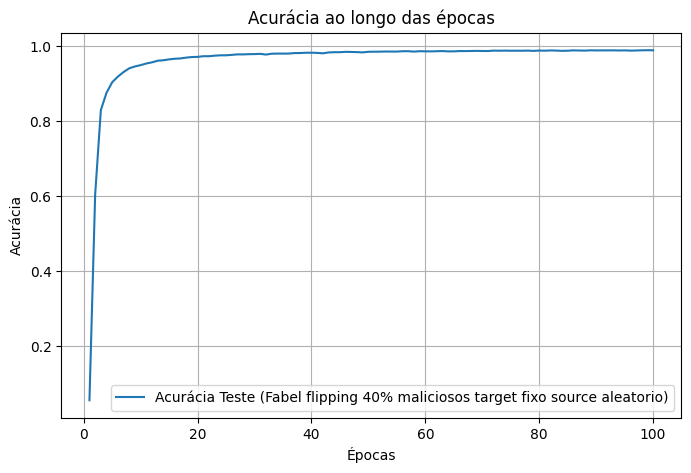

Acurácia final (Fabel flipping 40% maliciosos target fixo source aleatorio): 0.988403313339046


In [97]:
plotar_acuracia_individual(todos_resultados['sem_ataque'], nome="Sem Ataque")
plotar_acuracia_individual(todos_resultados['flipping_fixos_40'], nome="Fabel flipping 40% maliciosos fixos")
plotar_acuracia_individual(todos_resultados['flipping_fixo_aleatorio_40'], nome="Fabel flipping 40% maliciosos target fixo source aleatorio")
plotar_acuracia_individual(
    todos_resultados['flipping_aleatorios_40'], 
    nome="Fabel flipping 40% maliciosos target fixo source aleatorio"
)

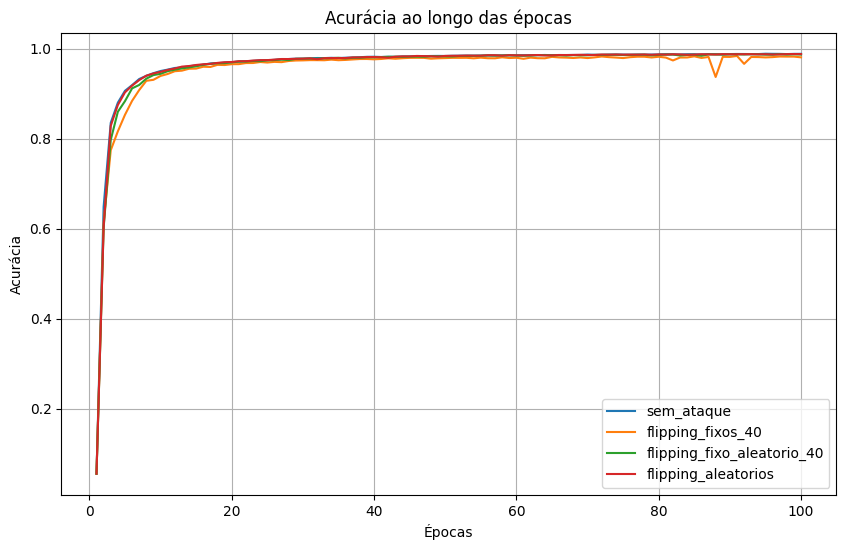

Acurácia final (sem_ataque): 0.9889745786918024
Acurácia final (flipping_fixos_40): 0.9811482433590403
Acurácia final (flipping_fixo_aleatorio_40): 0.9873179091688089
Acurácia final (flipping_aleatorios): 0.988403313339046


In [38]:
plotar_acuracias(todos_resultados)

## Loss

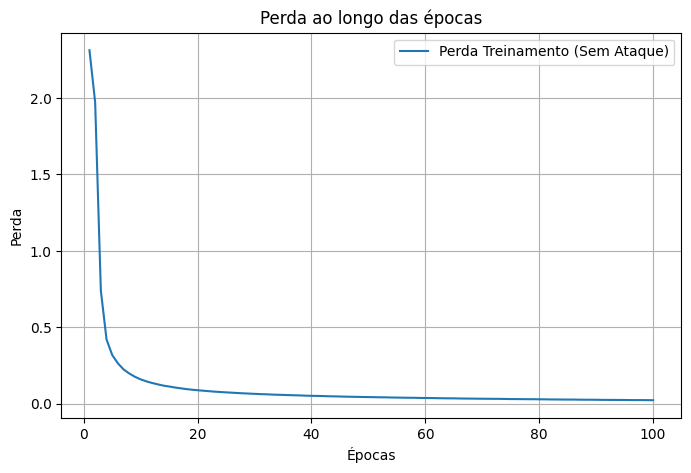

Perda final (Sem Ataque): 0.02353024773938553


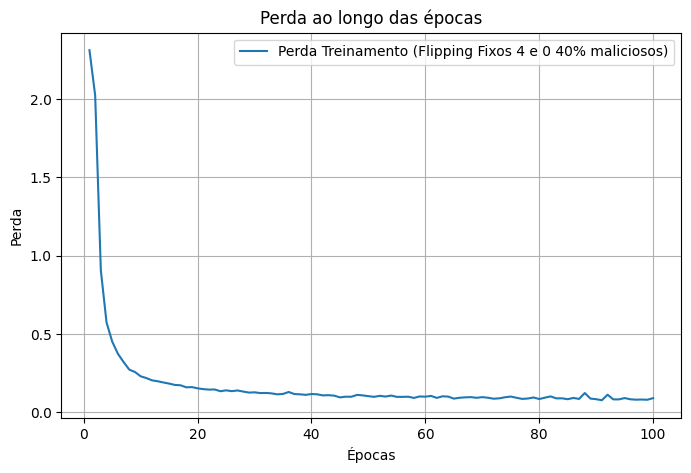

Perda final (Flipping Fixos 4 e 0 40% maliciosos): 0.08995873723077756


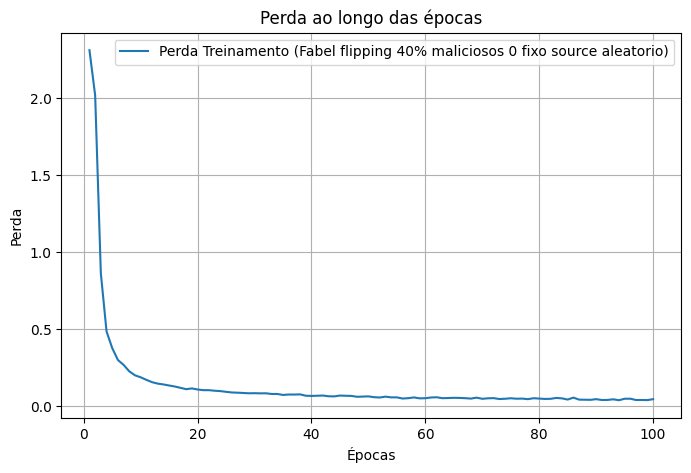

Perda final (Fabel flipping 40% maliciosos 0 fixo source aleatorio): 0.04739220635042299


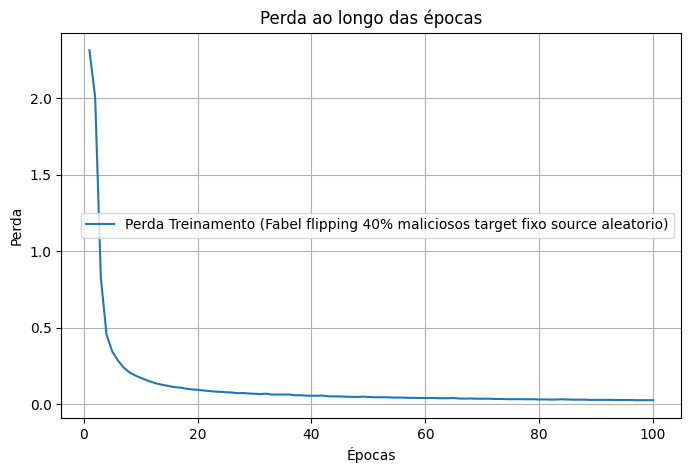

Perda final (Fabel flipping 40% maliciosos target fixo source aleatorio): 0.026525049449830956


In [98]:
plotar_loss_individual(todos_resultados['sem_ataque'], nome="Sem Ataque")
plotar_loss_individual(todos_resultados['flipping_fixos_40'], nome="Flipping Fixos 4 e 0 40% maliciosos")
plotar_loss_individual(todos_resultados['flipping_fixo_aleatorio_40'], nome="Fabel flipping 40% maliciosos 0 fixo source aleatorio")
plotar_loss_individual(
    todos_resultados['flipping_aleatorios_40'], 
    nome="Fabel flipping 40% maliciosos target fixo source aleatorio"
)

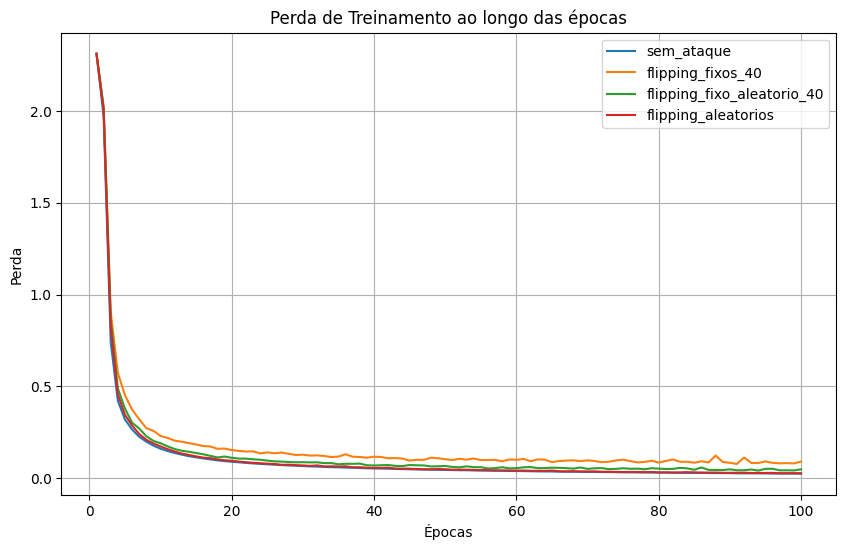

Perda final (sem_ataque): 0.02353024773938553
Perda final (flipping_fixos_40): 0.08995873723077756
Perda final (flipping_fixo_aleatorio_40): 0.04739220635042299
Perda final (flipping_aleatorios): 0.026525049449830956


In [52]:
plotar_losses(todos_resultados)

## Matrix de confusão

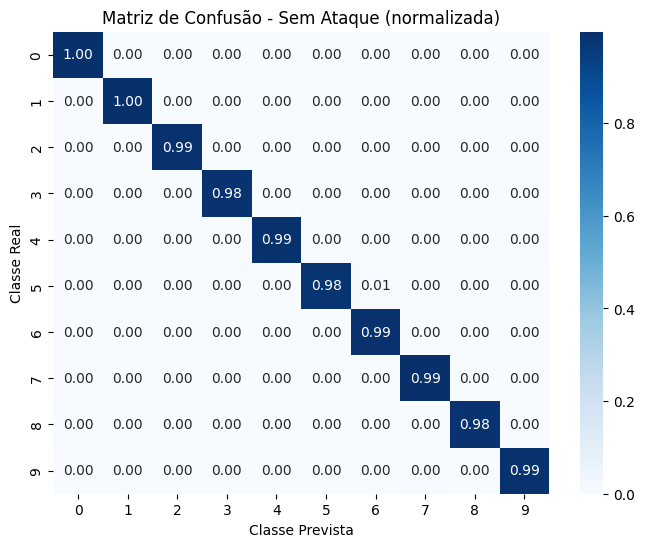

<Figure size 600x500 with 0 Axes>

In [69]:
plotar_confusion_matrix_individual(
    todos_resultados['sem_ataque']['confusion_matrix'][-1],
    nome="Sem Ataque", 
    labels=[str(i) for i in range(10)]  # se for MNIST
)


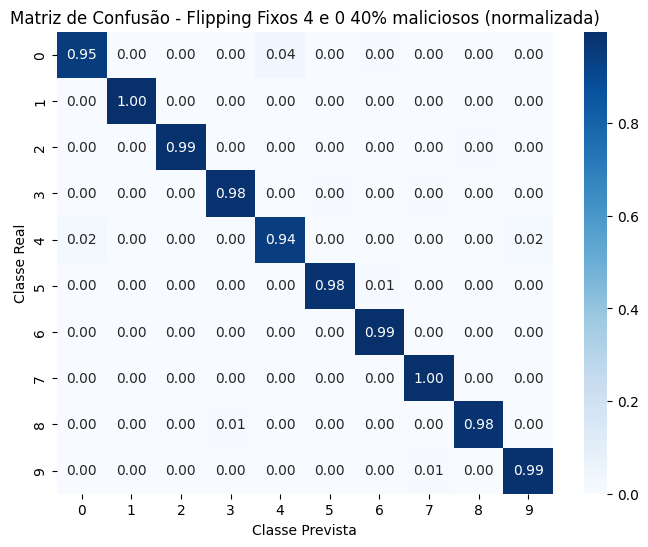

<Figure size 600x500 with 0 Axes>

In [71]:
plotar_confusion_matrix_individual(
    todos_resultados['flipping_fixos_40']['confusion_matrix'][-1],
    nome="Flipping Fixos 4 e 0 40% maliciosos", 
    labels=[str(i) for i in range(10)]  # se for MNIST
)

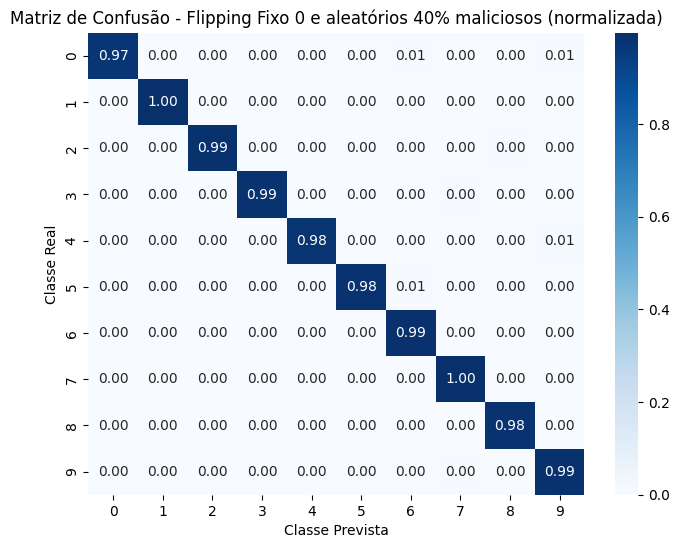

<Figure size 600x500 with 0 Axes>

In [73]:
plotar_confusion_matrix_individual(
    todos_resultados['flipping_fixo_aleatorio_40']['confusion_matrix'][-1],
    nome="Flipping Fixo 0 e aleatórios 40% maliciosos", 
    labels=[str(i) for i in range(10)]  # se for MNIST
)

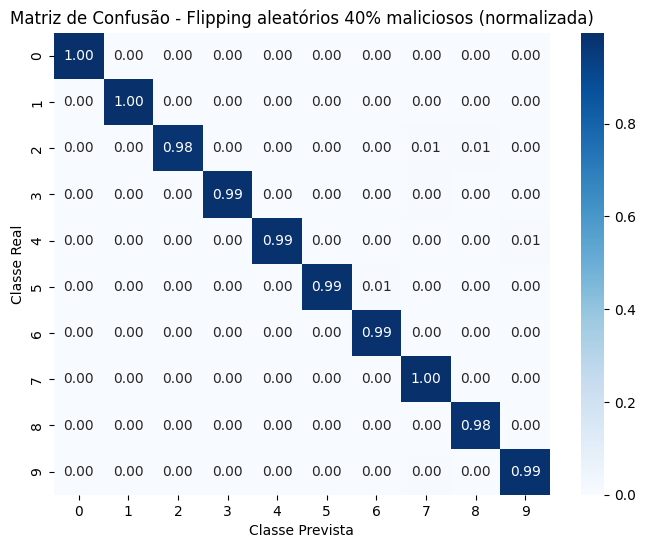

<Figure size 600x500 with 0 Axes>

In [99]:
plotar_confusion_matrix_individual(
    todos_resultados['flipping_aleatorios_40']['confusion_matrix'][-1],
    nome="Flipping aleatórios 40% maliciosos", 
    labels=[str(i) for i in range(10)]  # se for MNIST
)

In [87]:
recalls_df = calcular_recall_df(todos_resultados['sem_ataque'], labels=[str(i) for i in range(10)])
print(recalls_df)

  Classe    Recall
0      0  0.997719
1      1  0.996028
2      2  0.988138
3      3  0.984321
4      4  0.987493
5      5  0.979034
6      6  0.990703
7      7  0.993996
8      8  0.982778
9      9  0.987086


In [88]:
recalls_df = calcular_recall_df(todos_resultados['flipping_fixos_40'], labels=[str(i) for i in range(10)])
print(recalls_df)

  Classe    Recall
0      0  0.948119
1      1  0.997517
2      2  0.987544
3      3  0.984901
4      4  0.944610
5      5  0.984117
6      6  0.994189
7      7  0.996179
8      8  0.982204
9      9  0.988209


In [89]:
recalls_df = calcular_recall_df(todos_resultados['flipping_fixo_aleatorio_40'], labels=[str(i) for i in range(10)])
print(recalls_df)

  Classe    Recall
0      0  0.974914
1      1  0.997517
2      2  0.988138
3      3  0.985482
4      4  0.981537
5      5  0.984752
6      6  0.993027
7      7  0.995087
8      8  0.983927
9      9  0.986524


In [100]:
recalls_df = calcular_recall_df(todos_resultados['flipping_aleatorios_40'], labels=[str(i) for i in range(10)])
print(recalls_df)

  Classe    Recall
0      0  0.996009
1      1  0.995531
2      2  0.978055
3      3  0.986643
4      4  0.985706
5      5  0.985388
6      6  0.991865
7      7  0.995087
8      8  0.982204
9      9  0.985401
